# Error Correction Comparision Between a Reciprocal and Non-Reciprocal Device
The purpose of this notebook is to compare the results of applying functions in pyMeasure.Code.Analysis.SParameter with the application of corrections directly through StatistiCAL

Overview:
1. Start StatistiCAL
2. Select Help->Load Sample Problem with DUT
3. Press Calibrate
4. Select Results->Save Corrected DUT->Save as DUT.txt
5. Select Results->Save 12 Term Error Correction->Save as ErrorCoefficents.txt
6. Select Results->Save Solution Vector -> Solution_Plus.txt (Saves isolation and switch terms too, Has both recip and non recip)
7. Select Results->Save 4-port error box-> ErrorBox.s4p
7. Open and Plot corrected DUT using pyMeasure (this is an average I think DY202, DY2022, DY202 measured with Rnd noise,etc)
8. Open DY202 with pyMeasure, Open SolutionVector, Open ErrorCoefficents
9. Correct DY202 and store as s2p
10. Plot DUT, and Corrected DY202 using both methods 

In [1]:
import re,os
from pyMeasure import *

The module smithplot was not found,please put it on the python path


In [2]:
JUPYTER_DIRECTORY=r'C:\Users\sandersa\PyCharm Projects\Jupyter-Notebooks'
TEST_DIRECTORY=os.path.join(JUPYTER_DIRECTORY,"Error_Correction_Comparison_Files")

In [3]:
# File that happens after Results->Save Corrected DUT sparameters
corrected_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"DUT.txt"))
# File that results if you open CalibrateDUT.EXE and use the 12 term correction and then save the result usigng DY202.txt
StatistiCAL_corrected_DUT=S2PV1(os.path.join(TEST_DIRECTORY,"TwelveTermCorrectedDUTStatistiCAL.txt"))
# The files it averaged to get corrected_DUT before averaging
uncorrected_DUTs=map(lambda x:S2PV1(os.path.join(TEST_DIRECTORY,x)),["DY202.txt","DY2022.txt",
                                        "DY202_measured with rnd.txt",
                                        "DY202_measured with rnd1.txt"])

<IPython.core.display.Javascript object>


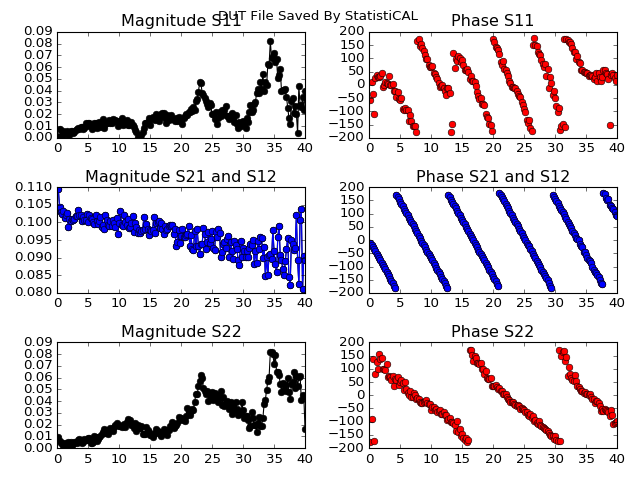

In [4]:
%matplotlib notebook
corrected_DUT.show()
plt.suptitle("DUT File Saved By StatistiCAL ")
plt.tight_layout()

<IPython.core.display.Javascript object>


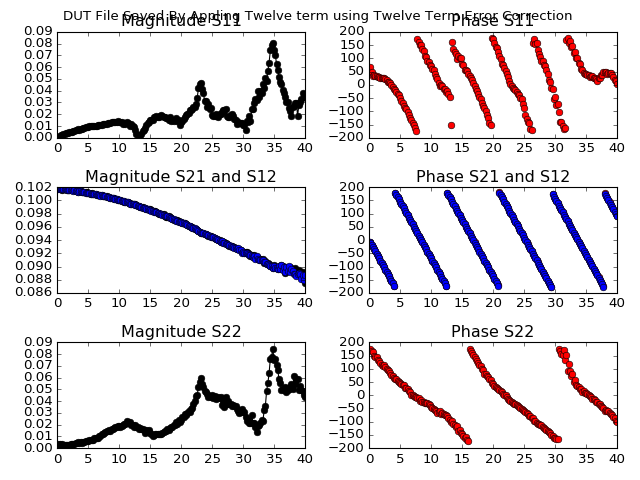

In [5]:
StatistiCAL_corrected_DUT.show()
plt.suptitle("DUT File Saved By Appling Twelve term using Twelve Term Error Correction ")
plt.tight_layout()

In [6]:
# open the correction files
twelve_term=TwelveTermErrorModel(os.path.join(TEST_DIRECTORY,"CalCoefficients.txt"))
solution_vector=StatistiCALSolutionModel(os.path.join(TEST_DIRECTORY,"Solution_Plus.txt"))
solution_vector_nonreciprocal=StatistiCALSolutionModel(os.path.join(TEST_DIRECTORY,"Solution_Plus.txt"),reciprocal=False)
switch_terms=S2PV1(os.path.join(TEST_DIRECTORY,"SwitchTerms.txt"))
four_port=SNP(os.path.join(TEST_DIRECTORY,"ErrorBox.s4p"))

In [7]:
switch_corrected_DUTS=map(lambda x: x.correct_switch_terms(switch_terms.sparameter_complex),uncorrected_DUTs)

In [8]:
pyMeasure_corrected_complex=map(lambda x:correct_sparameters_twelve_term(x.sparameter_complex,
                                                                      twelve_term.complex_data),uncorrected_DUTs)
pyMeasure_corrected_complex_nonreciprocal=map(lambda x:correct_sparameters_twelve_term(x.sparameter_complex,
                                                                      twelve_term.complex_data,reciprocal=False),
                                uncorrected_DUTs)
pyMeasure_eight_term_complex=map(lambda x:correct_sparameters_eight_term(x.sparameter_complex,
                                                                      solution_vector.eight_term_correction),uncorrected_DUTs)
pyMeasure_eight_term_complex_nonreciprocal=map(lambda x:correct_sparameters_eight_term(x.sparameter_complex,
                                                                      solution_vector.eight_term_correction,
                                                                                       reciprocal=False),uncorrected_DUTs)
pyMeasure_sixteen_term_complex=map(lambda x:correct_sparameters_sixteen_term(x.sparameter_complex,
                                                                   four_port.sparameter_complex),uncorrected_DUTs)
switch_corrected_DUTS=[]
for dut in uncorrected_DUTs:
    dut.correct_switch_terms(switch_terms.sparameter_complex)
    switch_corrected_DUTS.append(dut)
pyMeasure_eight_term_complex_sw=map(lambda x:correct_sparameters_eight_term(x.corrected_sparameter_data,
                                                                      solution_vector.eight_term_correction),switch_corrected_DUTS)

In [9]:
pyMeasure_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_corrected_complex)
pyMeasure_corrected_nonreciprocal_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),
                                           pyMeasure_corrected_complex_nonreciprocal)
pyMeasure_eight_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_eight_term_complex)
pyMeasure_eight_term__nonreciprocal_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),
                                                       pyMeasure_eight_term_complex_nonreciprocal)
pyMeasure_eight_term_corrected_DUTS_sw=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_eight_term_complex_sw)
pyMeasure_sixteen_term_corrected_DUTS=map(lambda x:S2PV1(None,sparameter_complex=x),pyMeasure_sixteen_term_complex)

<IPython.core.display.Javascript object>


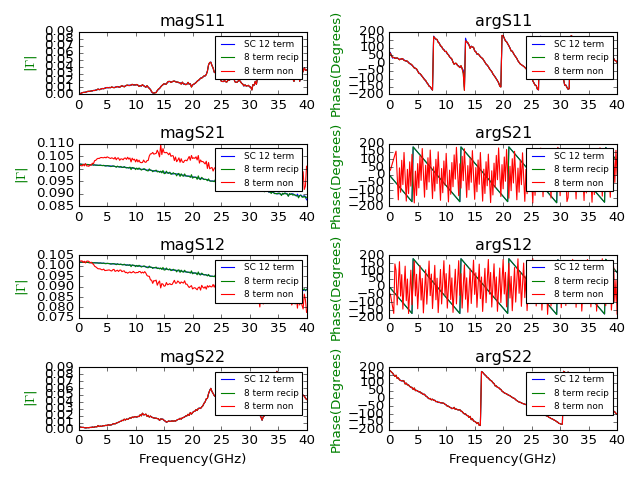

In [10]:
compare_s2p_plots([StatistiCAL_corrected_DUT,pyMeasure_eight_term_corrected_DUTS[0],
                   pyMeasure_eight_term__nonreciprocal_corrected_DUTS[0]],labels=["SC 12 term","8 term recip","8 term non"])

<IPython.core.display.Javascript object>


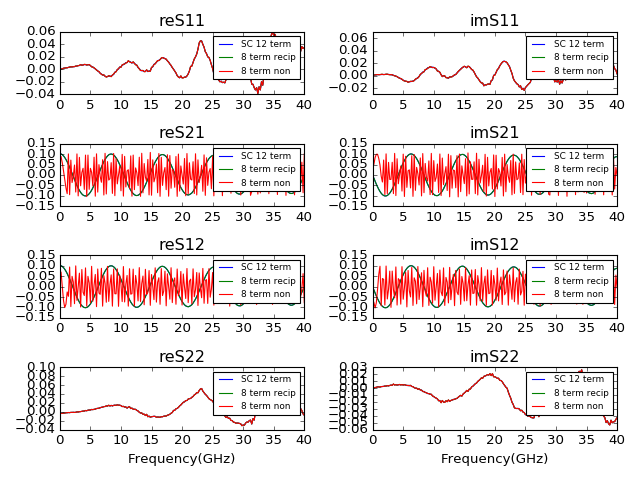

In [11]:
compare_s2p_plots([StatistiCAL_corrected_DUT,pyMeasure_eight_term_corrected_DUTS[0],
                   pyMeasure_eight_term__nonreciprocal_corrected_DUTS[0]],format="RI",
                  labels=["SC 12 term","8 term recip","8 term non"])

<IPython.core.display.Javascript object>


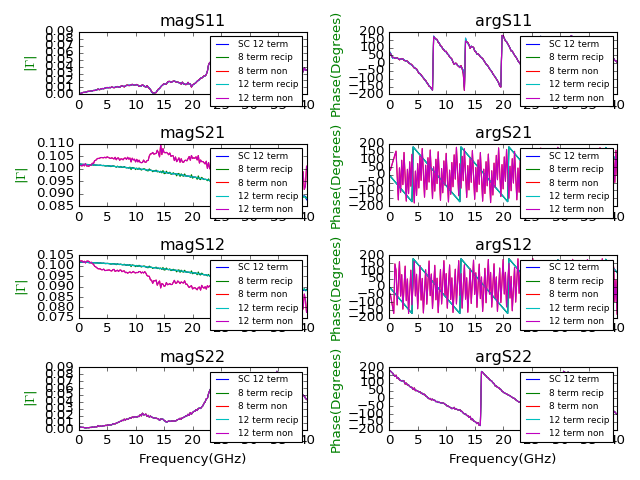

In [12]:
compare_s2p_plots([StatistiCAL_corrected_DUT,pyMeasure_eight_term_corrected_DUTS[0],
                   pyMeasure_eight_term__nonreciprocal_corrected_DUTS[0],
                   pyMeasure_corrected_DUTS[0],pyMeasure_eight_term__nonreciprocal_corrected_DUTS[0]],format="MA",
                  labels=["SC 12 term","8 term recip","8 term non","12 term recip","12 term non"])